In [2]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_blobs

dimensions de X: (100, 2)
dimensions de y: (100, 1)


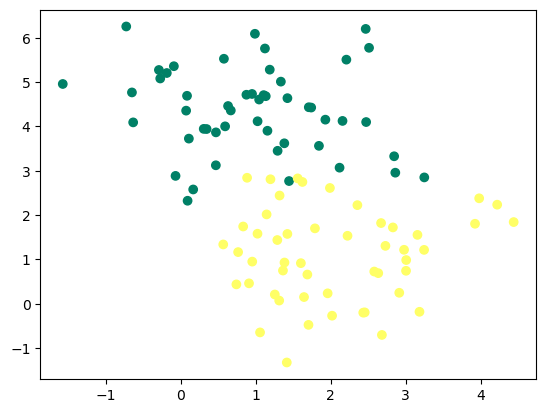

In [8]:
X,y=make_blobs(n_samples=100,n_features=2,centers=2,random_state=0)
y=y.reshape((y.shape[0],1))
print("dimensions de X:",X.shape)
print("dimensions de y:",y.shape)

plt.scatter(X[:,0],X[:,1],c=y,cmap="summer")
plt.show()

In [59]:
w=np.random.randn(X.shape[1],1)
b=np.random.randn(1)
def lineariser(w,b):
    return np.dot(X,w)+b
z=lineariser(w,b)
print(z.shape)

def sigmoide(z):
    return 1/(1+np.exp(-z))
A=sigmoide(z)
print(w)

(100, 1)
[[-1.55965285]
 [ 1.33556713]]


0.22345559637403864 0.2228382719374921


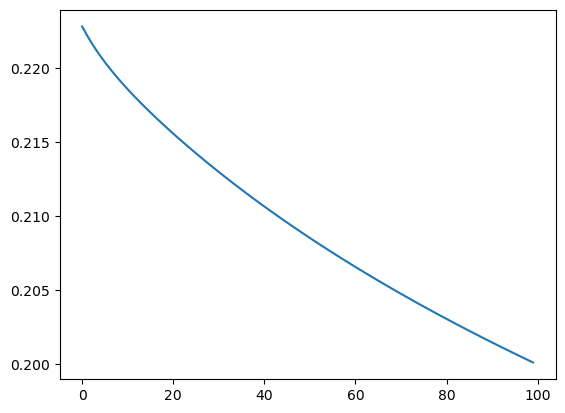

In [69]:
loss=(-1/len(y))*np.sum(y*np.log(A)+(1-y)*np.log(1-A))
dw1=(1/len(y))*np.sum((A-y)*X[:,0])
dw2=(1/len(y))*np.sum((A-y)*X[:,1])
#grad=np.array([dw1,dw2])
grad=(1/len(y))*X.T.dot(A-y)
db=(1/len(y))*np.sum(A-y)
w=w-0.1*grad

b=b-0.1*db
z=lineariser(w,b)
A=sigmoide(z)
loss2=(-1/len(y))*np.sum(y*np.log(A)+(1-y)*np.log(1-A))
print(loss,loss2)

def gradient_descent(X,y,w=w,b=b):
    
    z=lineariser(w,b)
    A=sigmoide(z)
    loss=[]
    for i in range(100):
        loss.append((-1/len(y))*np.sum(y*np.log(A)+(1-y)*np.log(1-A)))
        grad=grad=(1/len(y))*X.T.dot(A-y)
        db=(1/len(y))*np.sum(A-y)
        w=w-0.1*grad
        b=b-0.1*db
        z=lineariser(w,b)
        A=sigmoide(z)
    return loss,w,b

loss,w_f,b_f=gradient_descent(X,y)
#print(loss[:10])
plt.plot(loss)
plt.show()

[[ 1.25661485]
 [-1.30614425]] [1.23039853]


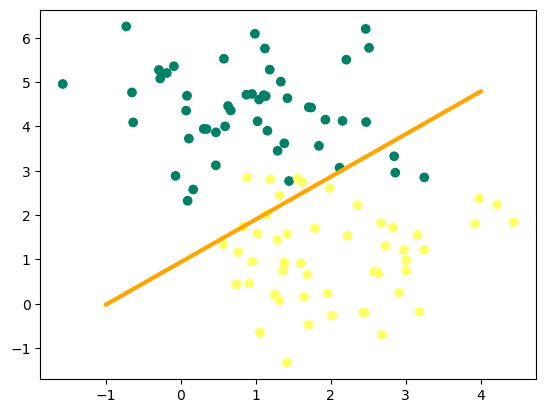

In [72]:
print(w_f,b_f)

plt.scatter(X[:,0],X[:,1],c=y,cmap="summer")
x1=np.linspace(-1,4,100)
x2=(-b_f-x1*w_f[0])/w_f[1]
plt.plot(x1,x2,c="orange",lw=3)